In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
twitter_data = pd.read_excel('vaccination_tweets.xlsx',sheet_name='vaccination_tweets')

In [ ]:
twitter_data['Country'].fillna('NA',inplace=True)
nb_countries = len(twitter_data['Country'].unique())
freq=pd.DataFrame(twitter_data['Country'].value_counts())
freq.reset_index(inplace=True)
freq.columns = ['Country','Country_freq']


In [4]:
twitter_data  = twitter_data.merge(freq,how='left',on='Country')

In [65]:
twitter_data['text_length'] = twitter_data['text'].apply(lambda t:len(t))
def link_extractor(text):
    if '¦' in text:
        return text.split('¦')[1].strip()
    else:
        return ""
def text_extractor(text):
    if '¦' in text:
        return text.split('¦')[0].strip()
    else:
        return text.strip()

twitter_data['link'] = twitter_data['text'].apply(lambda t:link_extractor(t))
twitter_data['text'] = twitter_data['text'].apply(lambda t:text_extractor(t))

In [66]:
twitter_data.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Country,Country_freq,text_length,link
0,1340539111971510016,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,United States,610,97,
1,1338158543359249920,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,United States,610,142,https://t.co/dlCHrZjkhm
2,1337858199140110080,eliðŸ‡±ðŸ‡¹ðŸ‡ªðŸ‡ºðŸ‘Œ,Your Bed,"heil, hydra ðŸ–â˜º",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,NA,827,142,https://t.co/ieYlCKBr8P
3,1337855739918830080,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,Canada,156,142,https://t.co/jqgV18kch4
4,1337854064604960000,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NA,827,137,https://t.co/KxbSRoBEHq
5,1337852648389829888,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,United Kingdom,490,130,https://t.co/EifsyQoeKN
6,1337851215875599872,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,Austria,3,141,https://t.co/IfMrAyGyTP
7,1337850832256169984,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,NA,827,140,https://t.co/77u4f8XXfx
8,1337850023531340032,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,NA,827,80,
9,1337842295857619968,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,Pakistan,18,141,https://t.co/MksOvBvs5w


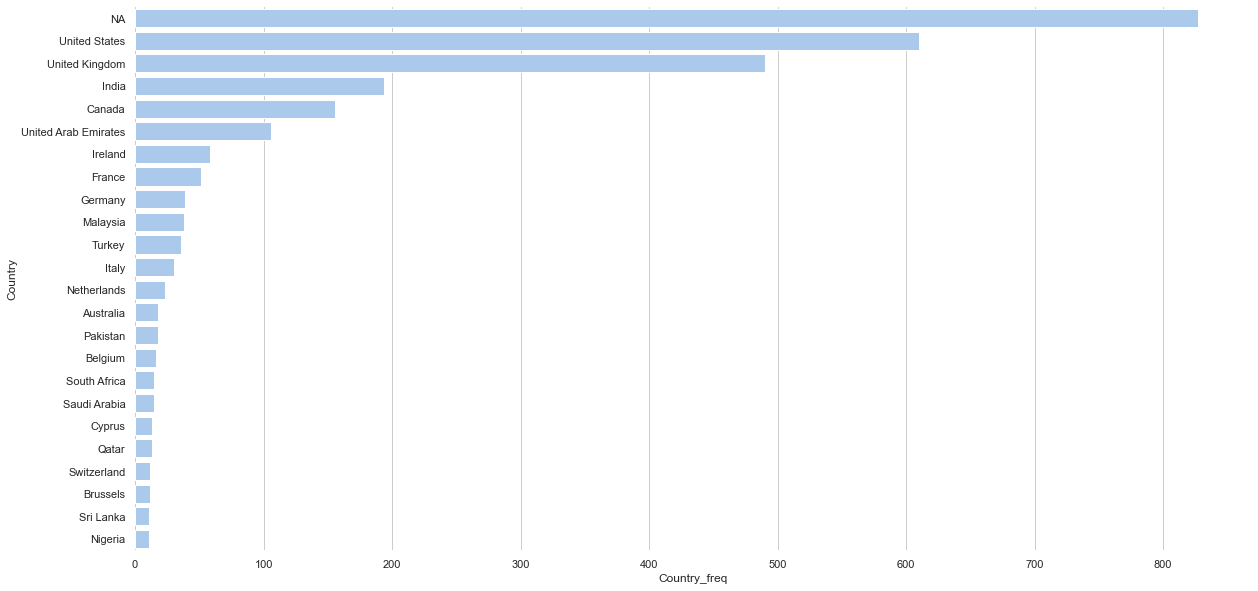

In [31]:
sns.set_palette("GnBu_d")
sns.set(style="whitegrid")
# Load the example car crash dataset
twitter_data_sample = twitter_data[twitter_data['Country_freq']>10].sort_values("Country_freq", ascending=False)

plt.figure(figsize=(20,10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Country_freq", y='Country', data=twitter_data_sample,
            label="Total", color="b")


sns.despine(left=True, bottom=True)

In [63]:

hashtags = []
for element in  twitter_data['hashtags'].fillna("").unique():
        for hashtag in element.replace("[","").replace("]","").replace("'","").split(','):
            if not hashtag.strip().lower() in hashtags and not (hashtag==""):
                hashtags.append(hashtag.strip().lower())
pd.DataFrame(hashtags).to_csv("words.csv")

<AxesSubplot:>

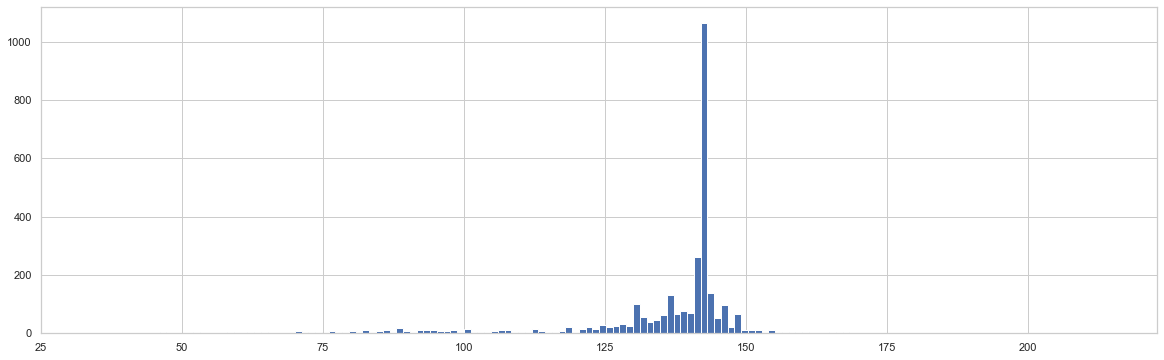

In [8]:
twitter_data['text_length'].hist(bins=150,figsize=(20,6))

In [9]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of cleantext words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
bow_transformer = CountVectorizer(analyzer = text_process).fit(twitter_data['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waelj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000019AA9DE5310>)

In [30]:
messages_bow = bow_transformer.transform(twitter_data['text'])

In [18]:
print('Shape of Sparse Matrix ',messages_bow.shape)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print("The sparsity of the matrix is {}".format(sparsity))

Shape of Sparse Matrix  (2978, 12200)
The sparsity of the matrix is 0.09276497594380649


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf

<2978x12200 sparse matrix of type '<class 'numpy.float64'>'
	with 33703 stored elements in Compressed Sparse Row format>